# Predicting heart disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model 
capable of predicting whether or not someone has heart disease based on their medical attributes.

we are going to take to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the cleavland data from the UCI Machine learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci?resource=download

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features 

This is where you will get different information about each of the features in your data

**Create data dictionary**

Age
Sex : male : 1
female : 0

chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

resting blood pressure (in mm Hg on admission to the hospital

serum cholestoral in mg/dl

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

resting electrocardiographic results

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

--Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

Target : 0 No Heart disease
1 Heart diseaset : 0 No Heart disease
1 Heart disease


# Preparing the tools

we are going to use pandas,Matplotlib and NumPy for data analysis and manipulation

In [3]:
#import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
! pip install --upgrade seaborn
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# models from Sickit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [4]:
df = pd.read_csv("heart.csv")
df.shape

(1025, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. what questions are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
# Normalized value counts
df.target.value_counts(normalize=True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

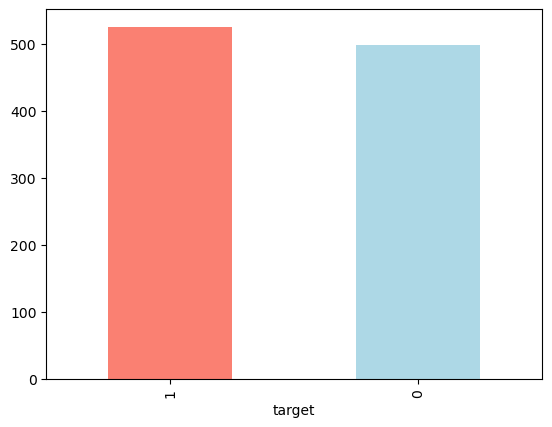

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Freqency according to Sex

In [12]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [13]:
#compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


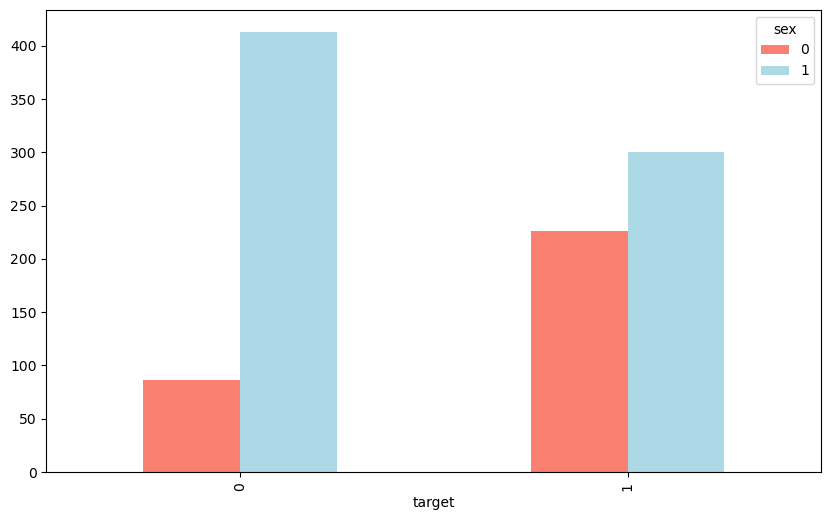

In [14]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

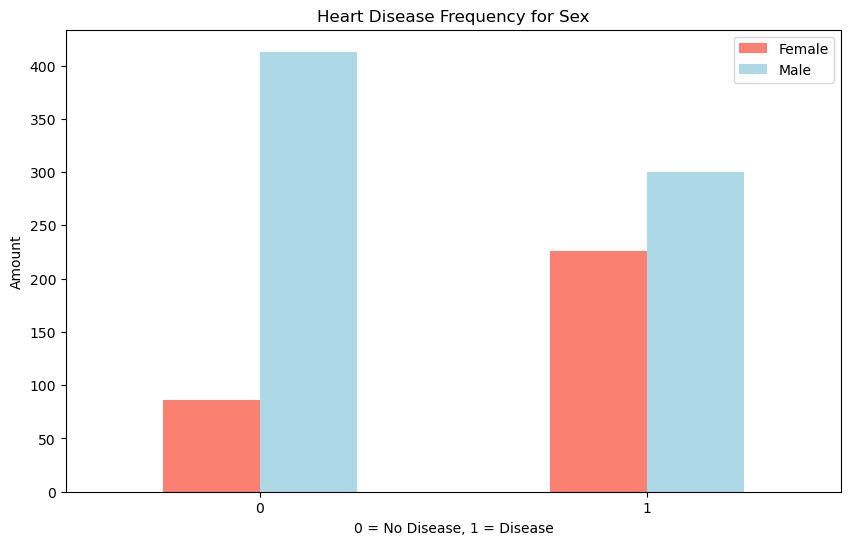

In [15]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [16]:
df["thalach"].value_counts()

thalach
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: count, Length: 91, dtype: int64

## Age vs Max Heart Rate for Heart Disease

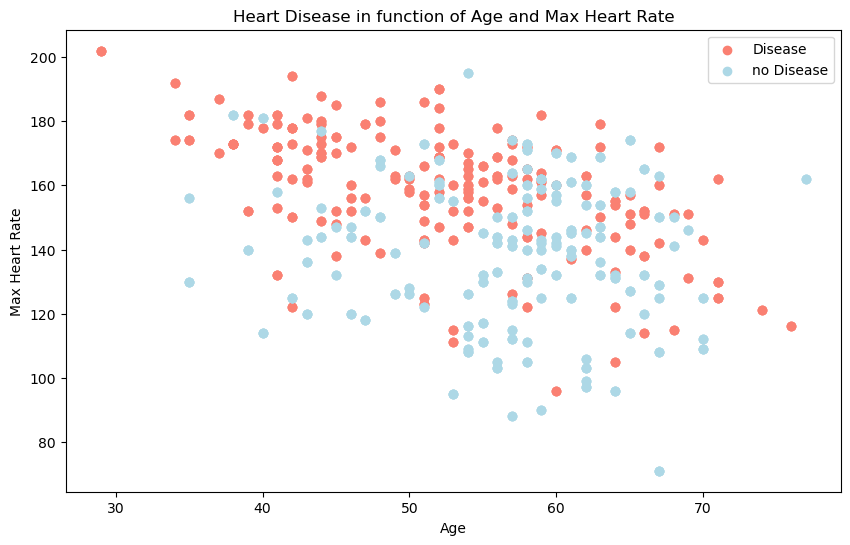

In [17]:
# create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

#scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

#add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","no Disease"]);

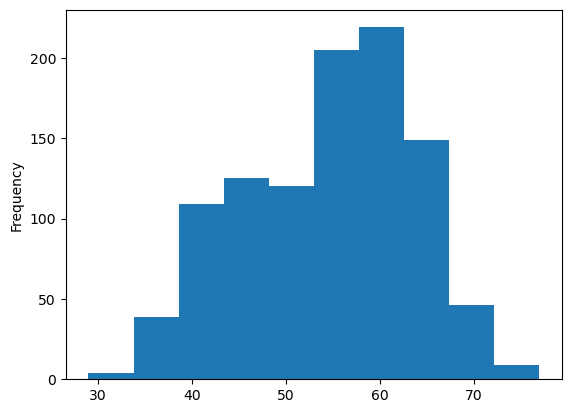

In [18]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


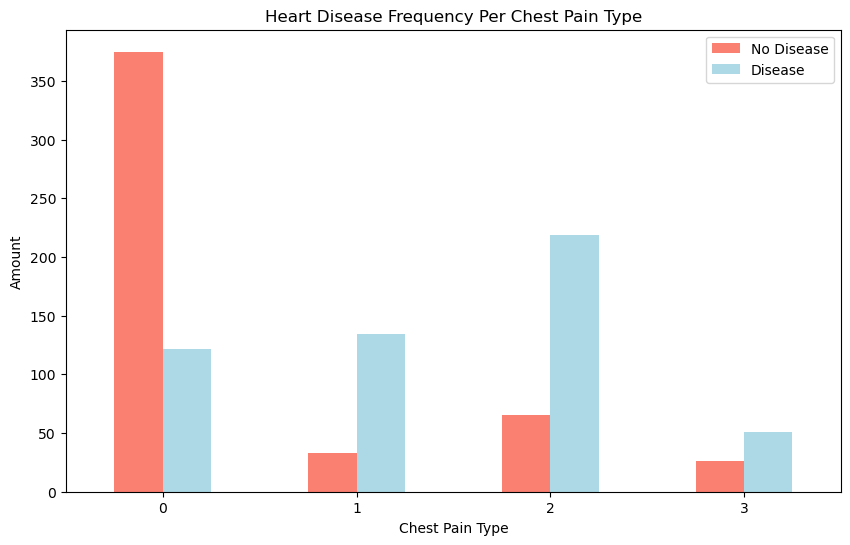

In [20]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [21]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


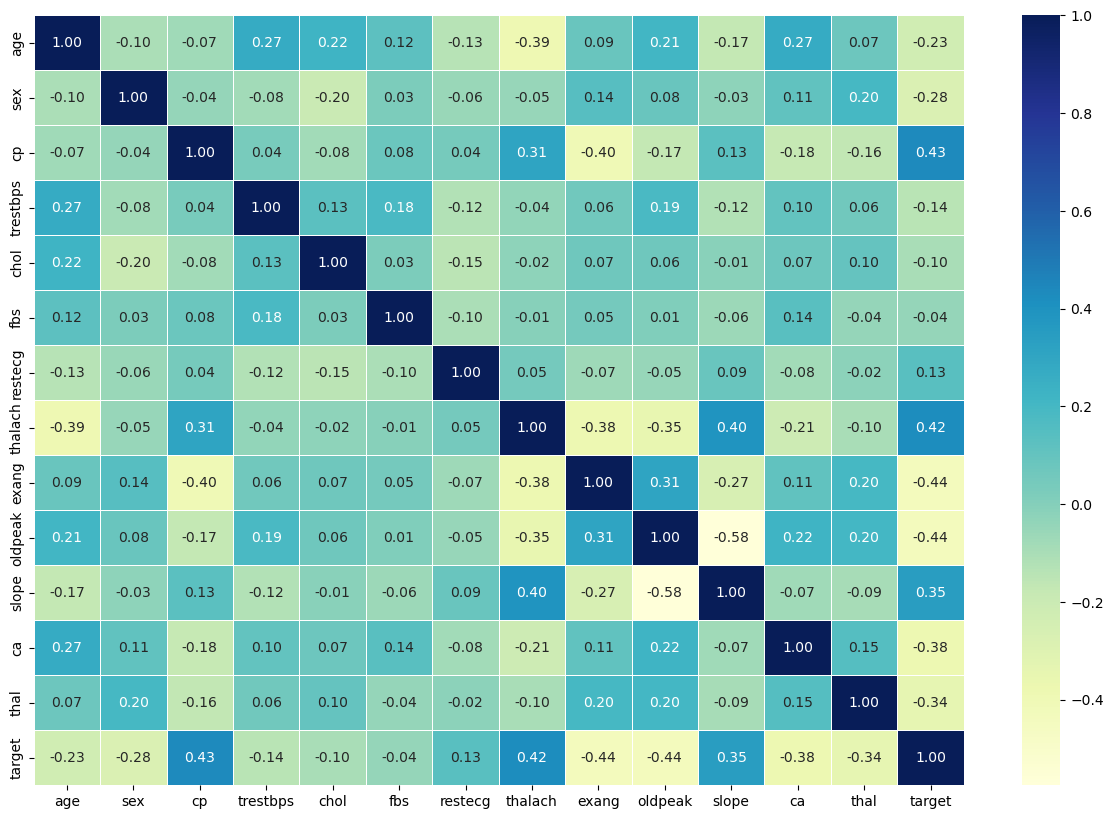

In [22]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# 5. Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [24]:
# split the data into X and Y
X = df.drop("target", axis=1)

Y=df["target"]

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [26]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [27]:
# split data into train and test sets
np.random.seed(42)

#Split into train & test set
X_train, X_test, Y_train, Y_test  = train_test_split(X,
                                                     Y,
                                                     test_size=0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [29]:
Y_train,len(Y_train)

(835    0
 137    1
 534    1
 495    1
 244    1
       ..
 700    1
 71     0
 106    0
 270    1
 860    0
 Name: target, Length: 820, dtype: int64,
 820)

Now we have got our data split into training and test sets, it's time to build a machine learning model.

We'll train it(find the patterns) on the training set.

and We'll test it (use the patterns) on the test set.

we're going to try 3 different machinr learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [30]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different scikit-learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    Y_train : training labels
    Y_test : testing labels
    """
    #set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores    

In [31]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            Y_train=Y_train,
                            Y_test=Y_test)
model_scores

C:\Users\Abhinavasai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

## Model Comparsion

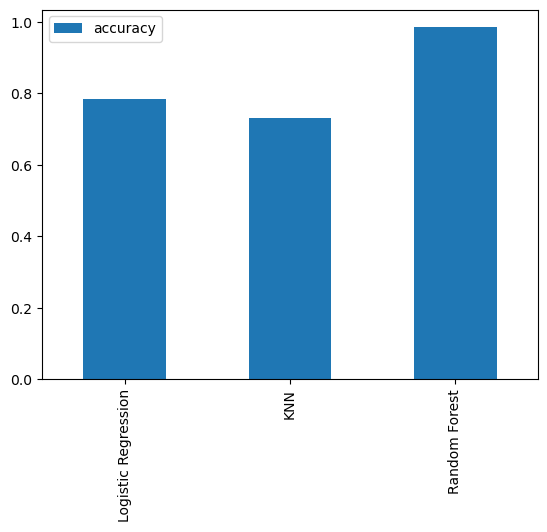

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model... and We know a model's first predictions aren't always what we should
based on our next steps off.What should we do?

let's look at the following:

* Hypterparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* precision
* Recall
* F1 score
* Classification report
* Roc curve
* Area under the curve(AUC

## Hyperparameter tuning(by hand)

In [33]:
# Let's tune KNN

train_scores = []
test_scores = []

# create a list of differnt values for n_neighbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, Y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train,Y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, Y_test))

Maximum KNN score on the test data: 98.536585%


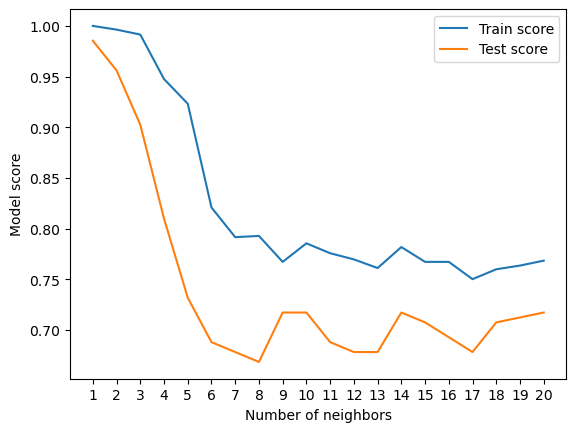

In [34]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:2f}%")

## Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
* logisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [35]:
# Create a  hyperparameter grid for LogisticRegression
log_reg_grid={"C": np.logspace(-4,4,20),
              "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,100,50),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameters grade setup for each of our models,
let's tune them using RandomizedSearchCV...

In [36]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [38]:
rs_log_reg.score(X_test,Y_test)

0.7853658536585366

Now we've tuned LogisticRegression(),let's do the same for RandomForestClassifier()

In [39]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [40]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': None}

In [41]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,Y_test)

0.9024390243902439

## Hyperparameter Tuning with GridSearchCV

since our LogisticRegression model provides the best scores so far,
 we'll try and improve them again using GridSearchCV...

In [42]:
#Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [43]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [44]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, Y_test)

0.7853658536585366

In [45]:
model_scores

{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

..and it would be great if cross-validation was used where possible.

To make comparisions and evaluate our trained model, first we need to make predictions.

In [46]:
# Make predictions with tuned model
Y_preds = gs_log_reg.predict(X_test)

In [47]:
Y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [48]:
Y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

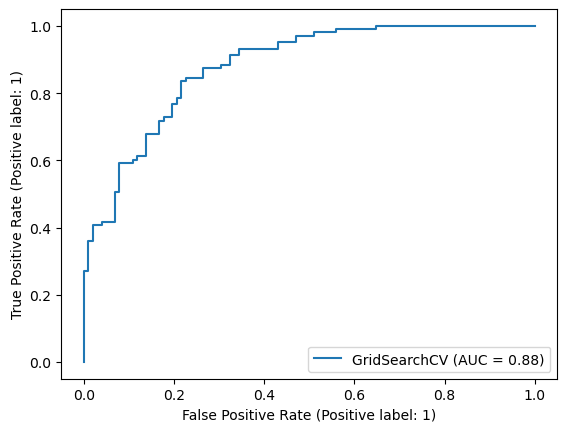

In [49]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test,
                               y=Y_test);

In [50]:
# Confusion matrix
print(confusion_matrix(Y_test,Y_preds))

[[71 31]
 [13 90]]


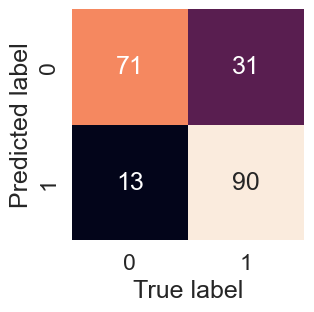

In [51]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, Y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax=plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(Y_test,Y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(Y_test, Y_preds)

Now we've got a ROc curve,an AUC metric and a confusion matrix,let's get a classification report as well as cross-validated precision,recall and f1-score.

In [52]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



## Calculate evaluation metrics using cross-validation

We're going to calculate accuracy,precision,recall and f1-score of our model using cross-validation and to do so we'll be using 'cross_val_score()'. 

In [53]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [54]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=1.3738237958832638,
                         solver="liblinear")

In [55]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.88780488, 0.85853659, 0.87317073, 0.8195122 , 0.8       ])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8478048780487806

In [57]:
# Cross-validated Precison
cv_precision = cross_val_score(clf,
                               X,
                               Y,
                               cv=5,
                               scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8226314773669621

In [58]:
# Cross-validated Recall
cv_recall=cross_val_score(clf,
                          X,
                          Y,
                          cv=5,
                          scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8974303683737646

In [59]:
# Cross-validated f1-score
cv_f1=cross_val_score(clf,
                      X,
                      Y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8583430306540801

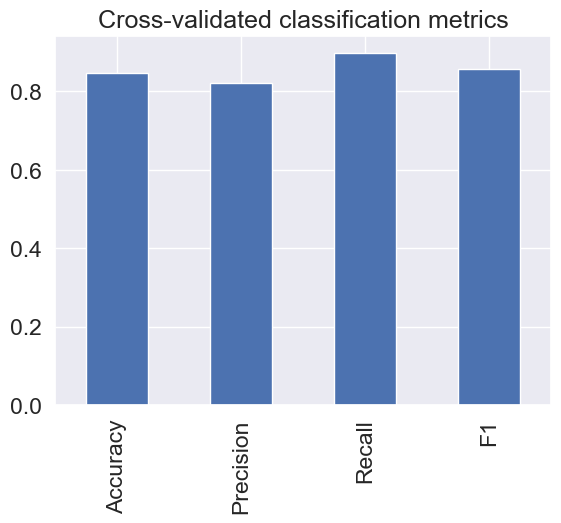

In [60]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

### Feature Importance

Feature importance is another as asking,"which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.one way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [61]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=1.3738237958832638,
                         solver="liblinear")

clf.fit(X_train,Y_train);

In [62]:
# check coef_
clf.coef_

array([[ 0.01317886, -1.66598722,  0.85030644, -0.01558897, -0.00820035,
        -0.2040116 ,  0.32254173,  0.03488921, -0.78931514, -0.64867068,
         0.566494  , -0.81419192, -1.03697069]])

In [63]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.013178861558196085,
 'sex': -1.6659872237282174,
 'cp': 0.8503064415591945,
 'trestbps': -0.015588967334443371,
 'chol': -0.008200350879692831,
 'fbs': -0.20401160321255557,
 'restecg': 0.32254172896092986,
 'thalach': 0.03488921311454817,
 'exang': -0.7893151356408693,
 'oldpeak': -0.648670677763911,
 'slope': 0.5664939966097383,
 'ca': -0.814191921376566,
 'thal': -1.0369706937648702}

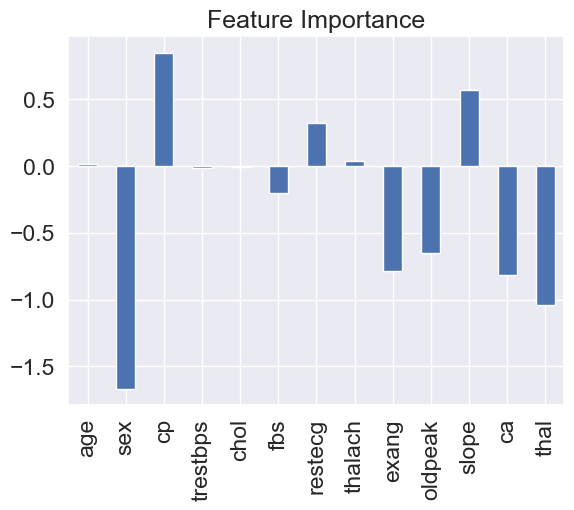

In [64]:
# Visualize features importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [65]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,86,226
1,413,300


In [66]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


In [67]:
import seaborn as sns
print(sns.__version__)

0.13.2
